In [42]:
import pandas as pd
categorical=pd.read_csv("ravdess_categorical.csv")

display(categorical.head())

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F
2,GNAA,happy,strong,Dogs are sitting by the door,2nd,16.0,F
3,GNAA,surprised,normal,Kids are talking by the door,1st,14.0,F
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F


In [43]:
df = pd.read_csv("ravdess_quantitative.csv")
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

/var/folders/rj/w4ftlkfd6397rww76gb543540000gn/T/ipykernel_3670/2255101031.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [44]:

scaler = StandardScaler()
X = df.values
scaler.fit(X)
X_scal = scaler.transform(X)
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100)
kmeans.fit(X_minmax)
kmeans.labels_


array([5, 5, 5, ..., 0, 3, 6], dtype=int32)

In [45]:
kmeans.cluster_centers_

array([[0.59149592, 0.92550982, 0.9231779 , 0.55311714, 0.63101817,
        0.54091666, 0.4397515 , 0.99472712, 0.92422491, 0.41438214,
        0.44038489, 0.38661883, 0.44241709, 0.54007179, 0.54461384,
        0.92727884, 0.51471559, 0.58603694, 0.46429097, 0.67469391,
        0.28342695],
       [0.78170252, 0.93894673, 0.96670833, 0.29141211, 0.61038605,
        0.74394646, 0.22858749, 0.96989685, 0.92977955, 0.42320771,
        0.53380166, 0.48891015, 0.40892   , 0.47546679, 0.62100567,
        0.9323698 , 0.41510343, 0.37118591, 0.52952715, 0.71755805,
        0.50445788],
       [0.73766257, 0.9397542 , 0.95874902, 0.47860947, 0.78411799,
        0.6815526 , 0.26576507, 0.97637625, 0.95098187, 0.27649647,
        0.31841579, 0.36579888, 0.53558564, 0.25744397, 0.54831556,
        0.93800199, 0.53829911, 0.65117518, 0.46546338, 0.61013528,
        0.33166858],
       [0.47195677, 0.95320686, 0.90933873, 0.64224984, 0.6178403 ,
        0.45765543, 0.56095139, 0.99644289, 0.9105674

In [46]:
centers = kmeans.cluster_centers_

In [47]:
centers = scaler.inverse_transform(centers)
df.columns

Index(['intensity', 'kur', 'max', 'mfcc_max', 'mfcc_mean', 'mfcc_min',
       'mfcc_std', 'min', 'sc_kur', 'sc_max', 'sc_mean', 'sc_min', 'sc_skew',
       'sc_std', 'skew', 'stft_kur', 'stft_mean', 'stft_min', 'stft_skew',
       'stft_std', 'zero_crossings_sum'],
      dtype='object')

In [52]:
df['kmeans_labels'] = kmeans.labels_


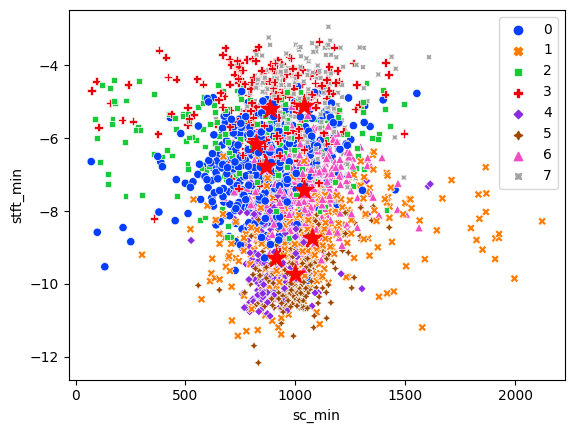

In [53]:
sns.scatterplot(data=df, x="sc_min", y="stft_min", hue='kmeans_labels', style='kmeans_labels',
                palette="bright")
plt.legend()
plt.scatter(centers[:,11], centers[:,17], c='red', marker='*', s=200)
plt.show()